## Teoria sobre Naive Bayes

Abordagem probabilística (Teorema de Bayes)

*Exemplos de uso*
 - Filtros de SPAM
 - Mineração de emoção
 - Separação de documentos

Serve para classificão de textos, mas não somente...


*Objetivo desse trabalho: Pegando a base de dados historica e irá gerar uma nova tabela de probablidade com suas respectivas classificaçaões*

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB

## PRE PROCESSAMENTO

#### 1 - importar a base
     - importante essa base possuir na ultima coluna a variavel que referencia a classe (variavel resposta)

#### 2 - tratando a base importada
     EXEMPLOS: 
     - Removendo Nulos
          -> base = base_credit.drop(base_credit[base['age'] < 0].index) 

     - Preencher os valores manualmente - melhor maneira de tratar colunas vazias
     - Preenchendo com a media
          -> base['age'][base['age']>0].mean(); #calculando a media
          
     - Substituindo os valores negativos pelos valores medios
          -> base.loc[base['age']<0] = base['age'][base['age']>0].mean()

#### 3 - separando a base entre previsores e classe
     - Criando a base *PREVISORA* - Nessa etapa removemos a ultima coluna
          -> x_base = base.iloc[:, 1:4].values 
    
     - Criando a base de *CLASSE* - Nessa etapa criamos por exemplo uma tabela com apenas uma coluna
          -> y_base = base.iloc[:, 4].values

#### 4 - etapa de padronização da base [Standardization]
     - Padronizacao com sklearn
          -> from sklearn.preprocessing import StandardScaler
          -> scaler_credit = StandardScaler()
          -> x_base = scaler_credit.fit_transform(x_base)

#### 5 - etapa de divisão entre as bases de treinamento e teste
     - Biblioteca utilizada:
          -> from sklearn.model_selection import train_test_split
     
     - Separando a base:
          -> x_base_treinamento, x_base_teste, y_base_treinamento, y_base_teste = train_test_split(x_base, y_base test_size=0.25, random_state=0)
    
     - Salvando as bases:
          -> import pickle
          -> with open('/Users/Documents/base.pkl', mode ='wb') as f:
    pickle.dump([x_base_treinamento, y_base_treinamento, x_base_teste, y_base_teste],f)
        

# Testando na base de Risco de Crédito

In [2]:
base_risco_credito = pd.read_csv('Bases de dados/risco_credito.csv')

In [3]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


*Separando os atributos previsores em X*

In [4]:
x_risco_credito = base_risco_credito.iloc[:,0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

*Separando o atributo de classe em Y*

In [5]:
y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

*Convertando textos para numeros através do label enconder*

In [6]:
from sklearn.preprocessing import LabelEncoder
label_enconder_historia = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantia = LabelEncoder()
label_enconder_renda = LabelEncoder()

*Aplicando processamentos*

In [7]:
x_risco_credito[:, 0] = label_enconder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:, 1] = label_enconder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:, 2] = label_enconder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:, 3] = label_enconder_renda.fit_transform(x_risco_credito[:,3])

In [8]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

*Salvando o resultado da base utilizando o pickle*

In [9]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([x_risco_credito, y_risco_credito],f)

### Utilizando o algoritmo de Naive Bayes

In [10]:
naive_risco_credito = GaussianNB()

#Realizando treinamento com o comando fit
#O treinamento do algoritmo é realizado atraves de uma tabela de probabilidade
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

*Usaremos como parametro o modelo abaixo para teste do modelo*

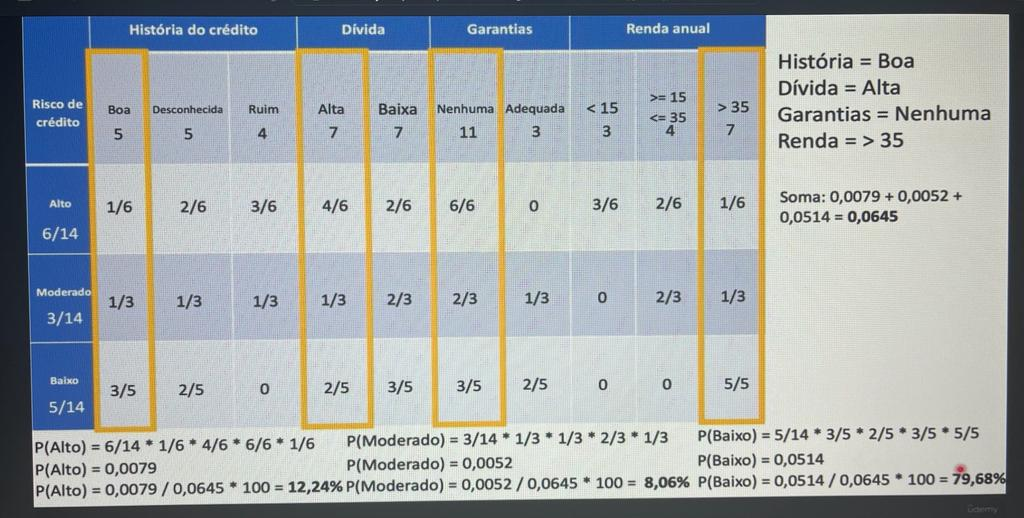

In [11]:
from IPython import display
display.Image("Imagens/teste_modelo_Bayes.jpeg")

In [12]:
#hitoria = boa / divida = alta / garantias = nenhuma / renda = acima de 35
#historia = 0 / divida  = 0 / garantias = 1 / renda = 2
previsao = naive_risco_credito.predict([[0,0,1,2]])


In [13]:
previsao

array(['baixo'], dtype='<U8')

In [14]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [15]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

# Testando na base de credito 

In [16]:
with open ('Bases de dados/credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [17]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [18]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

*Treinando*

In [19]:
#O certo seria utlizar as bases de treinamentos e nao a de testes

naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento.astype('int'), y_credit_treinamento.astype('int'))

GaussianNB()

In [20]:
previsoes = naive_credit_data.predict(x_credit_teste)

In [21]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [22]:
y_credit_teste.astype('int')

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Comparando as respostas esperadas versus modelo

In [23]:
from sklearn.metrics import accuracy_score

#### Validando a assertividade

In [24]:
accuracy_score(y_credit_teste, previsoes)

0.944

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_credit_teste, previsoes)

array([[429,   7],
       [ 21,  43]])

In [27]:
#facilitando a visualizacao do confusion
from yellowbrick.classifier import ConfusionMatrix

0.944

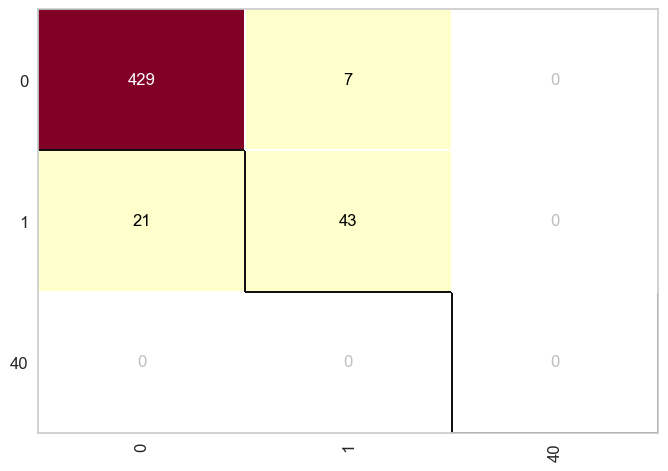

In [28]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste,y_credit_teste)

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       436
         1.0       0.86      0.67      0.75        64

    accuracy                           0.94       500
   macro avg       0.91      0.83      0.86       500
weighted avg       0.94      0.94      0.94       500

